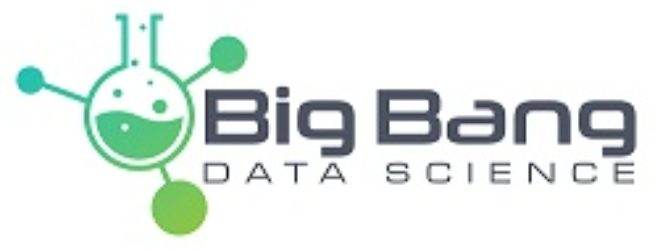

## Box Office Prediction Data Preperation 

This notebook looks into using various python-base machine learning and data science libraries in an attempt to build a ML model capable of predicting profitability of a movie before it released. steps:

1. problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimenetation

### 1. Problem Definition

Our goal is to build a model to predict the profitability of a movie before it released.

### 2. Data
We will use csv file given on BBDS 13 class

### 3. Evaluation

### 4. Features
Data Dictionary

•	budget – Total cost of the film.
•	country – Country the film was released in.
•	director – Name of the film’s director.
•	genre – The film’s primary genre category.
•	gross – Total gross revenue from the film.
•	name – Name and year of the film.
•	rating – MPAA rating of the film.
•	runtime – Length of the film, in minutes.
•	score – User score on IMDb.
•	star – Lead star of the film.
•	studio – Studio that produced the film.
•	votes – Number of user ratings on IMDb.

### 5. Models

1. Classification Models

### Preparing Tools

1. pandas for data analysis.
2. NumPy for numerical operations.
3. Matplotlib/seaborn for plotting or data visualization.
4. Scikit-Learn for machine learning modelling and evaluation.

In [24]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
sns.set() 

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [25]:
film = pd.read_csv("box_office_predictions.csv")

### Data Exploration (exploratory data analysis or EDA)

In [26]:
film.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000,UK,James Cameron,Action,760507625,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000,USA,James Cameron,Drama,658672302,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000,USA,Colin Trevorrow,Action,652270625,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000,USA,Joss Whedon,Action,623357910,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000,USA,Christopher Nolan,Action,534858444,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


In [27]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   int64  
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   int64  
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 562.6+ KB


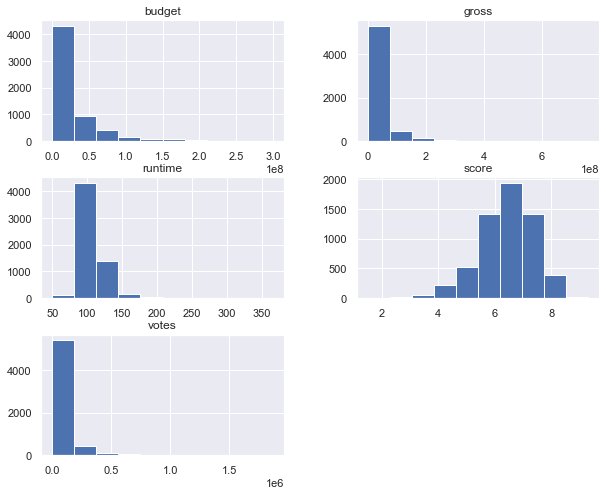

In [28]:
# Distribution 
features = ['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
            'runtime', 'score', 'star', 'studio', 'votes']

film[features].hist(figsize=(10, 8));

In [29]:
film.skew(axis = 0, skipna = True)

budget     2.586509
gross      3.901426
runtime    2.407584
score     -0.620615
votes      4.831332
dtype: float64

In [30]:
film.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
budget,6000.0,NaN,NaN,NaN,24699183.704833,37217097.656064,0.0,0.0,11000000.0,32625000.0,300000000.0
country,6000,52,USA,4281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6000,2549,Woody Allen,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,6000,17,Comedy,1818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross,6000.0,NaN,NaN,NaN,33416352.8195,57352054.815843,441.0,1527796.5,12298970.0,40072560.5,760507625.0
name,6000,6000,The Bourne Ultimatum (2007),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,6000,13,R,3009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,6000.0,NaN,NaN,NaN,106.587,18.026885,50.0,95.0,102.0,115.0,366.0
score,6000.0,NaN,NaN,NaN,6.386383,0.994921,1.5,5.8,6.5,7.1,9.3
star,6000,2317,Nicolas Cage,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
film.describe(include=['object', 'bool', 'category']).T

,count,unique,top,freq
country,6000,52,USA,4281
director,6000,2549,Woody Allen,29
genre,6000,17,Comedy,1818
name,6000,6000,The Bourne Ultimatum (2007),1
rating,6000,13,R,3009
star,6000,2317,Nicolas Cage,38
studio,6000,1996,Universal Pictures,269


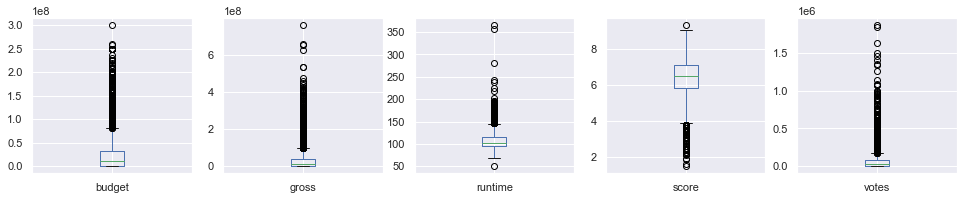

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
film.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()


### Handling Missing 0 Data in Budget (Impute with Median)

In [33]:
film['budget'].value_counts()

0           1911
20000000     166
30000000     164
25000000     160
15000000     152
            ... 
999999         1
3330000        1
9900000        1
22769          1
22700000       1
Name: budget, Length: 338, dtype: int64

In [34]:
# Impute missing numerical data with median '

median_budget = film.budget.median()
median_budget

11000000.0

In [35]:
film['budget'] = film['budget'].replace({0: 11000000})

In [36]:
film['budget'].value_counts()

11000000    1966
20000000     166
30000000     164
25000000     160
15000000     152
            ... 
999999         1
3330000        1
9900000        1
41300000       1
22700000       1
Name: budget, Length: 337, dtype: int64

### Creating a Target Variable ROI column

In [37]:
# film['profit'] = (film['gross'] - film['budget'])

In [38]:
film['roi'] = (film['gross'] - film['budget'])/film['budget']

In [39]:
film['roi'] = film['roi']*100

In [40]:
film.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,roi
0,237000000,UK,James Cameron,Action,760507625,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,220.889293
1,200000000,USA,James Cameron,Drama,658672302,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,229.336151
2,150000000,USA,Colin Trevorrow,Action,652270625,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,334.847083
3,220000000,USA,Joss Whedon,Action,623357910,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,183.344505
4,185000000,USA,Christopher Nolan,Action,534858444,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,189.112672


In [41]:
film['roi'].describe()

count      6000.000000
mean        183.337303
std        9317.548000
min         -99.995991
25%         -84.167176
50%         -33.225698
75%          63.642040
max      719358.733333
Name: roi, dtype: float64

In [42]:
film['roi'] = np.where(film['roi'] > 0.95, 1, 0)

In [43]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   int64  
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   int64  
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
 12  roi       6000 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 586.1+ KB


In [44]:
film.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,roi
0,237000000,UK,James Cameron,Action,760507625,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,1
1,200000000,USA,James Cameron,Drama,658672302,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1
2,150000000,USA,Colin Trevorrow,Action,652270625,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,1
3,220000000,USA,Joss Whedon,Action,623357910,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,1
4,185000000,USA,Christopher Nolan,Action,534858444,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,1


In [45]:
# film.roi = film.roi.astype('bool')
# film.dtypes

In [46]:
film['roi'].unique()

array([1, 0])

In [47]:
film.roi.value_counts()

0    3628
1    2372
Name: roi, dtype: int64

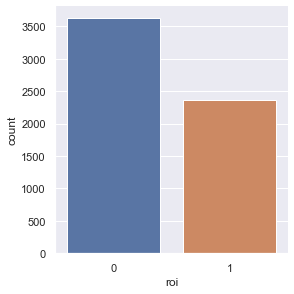

In [48]:
# film['roi'].hist(figsize = (12, 6));
sns.factorplot(x='roi', data=film, kind='count', size=4, aspect=1);

### Factorizing country into lower levels

In [49]:
film.loc[film['country'] != 'USA', ['country']] = 'non_USA'

In [50]:
film['country'].unique()

array(['non_USA', 'USA'], dtype=object)

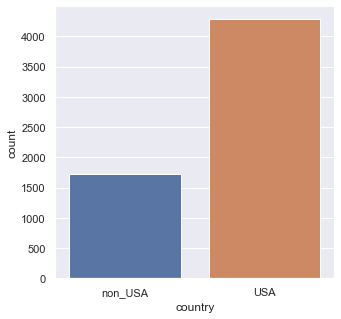

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(x='country', data=film);

In [52]:
CrosstabResult = pd.crosstab(index = film['country'], columns = film['roi'])
print(CrosstabResult)

roi         0     1
country            
USA      2246  2035
non_USA  1382   337


### Extracting and Factorizing star_ranking based on Profit & ROI

In [53]:
film.sort_values(by = ['roi'], ascending = False, inplace = True, ignore_index = True)
top_50 = film.loc[0:50, 'star']
film['star_ranking'] = top_50

In [54]:
film.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,roi,star_ranking
0,237000000,non_USA,James Cameron,Action,760507625,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,1,Sam Worthington
1,13000000,USA,John Lafia,Horror,28501605,Child's Play 2 (1990),R,84,5.8,Alex Vincent,Universal Pictures,34742,1,Alex Vincent
2,15000000,USA,Nicholas Hytner,Comedy,29106737,The Object of My Affection (1998),R,111,6.0,Jennifer Aniston,Twentieth Century Fox Film Corporation,16576,1,Jennifer Aniston
3,11000000,USA,Nelson McCormick,Crime,29062561,The Stepfather (2009),PG-13,101,5.6,Penn Badgley,Screen Gems,25305,1,Penn Badgley
4,6500000,USA,Jon Turteltaub,Action,29000301,3 Ninjas (1992),PG,84,5.2,Victor Wong,Touchstone Pictures,17457,1,Victor Wong


In [55]:
film['star_ranking'].unique()

array(['Sam Worthington', 'Alex Vincent', 'Jennifer Aniston',
       'Penn Badgley', 'Victor Wong', 'DJ Qualls', 'Michael Keaton',
       'Pauly Shore', 'Steve Martin', 'Kevin Costner',
       'Aaron Taylor-Johnson', 'Philip Seymour Hoffman', 'Goldie Hawn',
       'AlexSandra Wright', 'Jeremy Renner', 'Gene Hackman',
       'Emily Browning', 'Jesse Bradford', 'Joaquin Phoenix',
       'Mira Sorvino', 'Matthew Perry', 'Sidney Poitier',
       'Frances McDormand', 'Ethan Hawke', 'Josh Brolin', 'Jason Mewes',
       'Patrick Swayze', 'Bridget Fonda', 'Jason Statham',
       'GÃ©rard Depardieu', 'John Lithgow', 'Lindsay Lohan',
       'Kevin Bacon', 'Tom Welling', 'Robert Redford', 'Damon Wayans',
       'Keenen Ivory Wayans', 'Melanie Griffith', 'Melanie Brown',
       'Jake Gyllenhaal', 'Jim Caviezel', 'Jessica Simpson',
       'Morris Chestnut', 'Matthew Modine', 'Sanaa Lathan',
       'Christina Ricci', 'Taye Diggs', 'Ashley Judd',
       'Matthew McConaughey', 'Lake Bell', nan], dtype

In [56]:
film['star_ranking'] = film['star_ranking'].replace(to_replace =['Sam Worthington', 'Alex Vincent', 'Jennifer Aniston',
       'Penn Badgley', 'Victor Wong', 'DJ Qualls', 'Michael Keaton',
       'Pauly Shore', 'Steve Martin', 'Kevin Costner',
       'Aaron Taylor-Johnson', 'Philip Seymour Hoffman', 'Goldie Hawn',
       'AlexSandra Wright', 'Jeremy Renner', 'Gene Hackman',
       'Emily Browning', 'Jesse Bradford', 'Joaquin Phoenix',
       'Mira Sorvino', 'Matthew Perry', 'Sidney Poitier',
       'Frances McDormand', 'Ethan Hawke', 'Josh Brolin', 'Jason Mewes',
       'Patrick Swayze', 'Bridget Fonda', 'Jason Statham',
       'Gérard Depardieu', 'John Lithgow', 'Lindsay Lohan', 'Kevin Bacon',
       'Tom Welling', 'Robert Redford', 'Damon Wayans',
       'Keenen Ivory Wayans', 'Melanie Griffith', 'Melanie Brown',
       'Jake Gyllenhaal', 'Jim Caviezel', 'Jessica Simpson',
       'Morris Chestnut', 'Matthew Modine', 'Sanaa Lathan',
       'Christina Ricci', 'Taye Diggs', 'Ashley Judd',
       'Matthew McConaughey', 'Lake Bell'] ,  value ="famous")


In [57]:
film['star_ranking'].fillna('not_famous', inplace = True)

In [58]:
film['star_ranking'].unique()

array(['famous', 'GÃ©rard Depardieu', 'not_famous'], dtype=object)

### Extracting and Factorizing Top Sudios based on Profit & ROI

In [59]:
film.sort_values(by = ['roi'], ascending = False, inplace = True, ignore_index = True)
top_50 = film.loc[0:50, 'studio']
film['studio_ranking'] = top_50

In [60]:
film['studio_ranking'].unique()

array(['Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Walt Disney Pictures', 'Carousel Productions (II)',
       'Warner Bros.', 'Carolco Pictures', 'Paramount Pictures',
       'TriStar Pictures', 'FilmDistrict', 'Relativity Media',
       'Metro-Goldwyn-Mayer (MGM)', 'Focus Features',
       'Gary Sanchez Productions', 'Fox 2000 Pictures', 'Dimension Films',
       'Imagine Films Entertainment', 'Universal Pictures',
       'New Line Cinema', 'Touchstone Pictures', 'DreamWorks', 'Canal+',
       'Miramax', 'Fox Searchlight Pictures', 'Revolution Studios',
       'Don Simpson/Jerry Bruckheimer Films',
       'Oriental Light and Magic (OLM)', "It's a Laugh Productions",
       'Screen Gems', nan], dtype=object)

In [61]:
film['studio_ranking'] = film['studio_ranking'].replace(to_replace =['Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Walt Disney Pictures', 'Carousel Productions (II)',
       'Warner Bros.', 'Carolco Pictures', 'Paramount Pictures',
       'TriStar Pictures', 'FilmDistrict', 'Relativity Media',
       'Metro-Goldwyn-Mayer (MGM)', 'Focus Features',
       'Gary Sanchez Productions', 'Fox 2000 Pictures', 'Dimension Films',
       'Imagine Films Entertainment', 'Universal Pictures',
       'New Line Cinema', 'Touchstone Pictures', 'DreamWorks', 'Canal+',
       'Miramax', 'Fox Searchlight Pictures', 'Revolution Studios',
       'Don Simpson/Jerry Bruckheimer Films',
       'Oriental Light and Magic (OLM)', "It's a Laugh Productions",
       'Screen Gems'] ,  value ="top_known")


In [62]:
film['studio_ranking'].fillna('least_known', inplace = True)

In [63]:
film['studio_ranking'].unique()

array(['top_known', 'least_known'], dtype=object)

### Extracting and Factorizing Top Movies Names based on Profit & ROI

In [64]:
film.sort_values(by = ['roi'], ascending = False, inplace = True, ignore_index = True)
top_50 = film.loc[0:50, 'name']
film['movie_popularity'] = top_50

In [65]:
film['movie_popularity'].unique()

array(['Avatar (2009)', 'Swimfan (2002)', 'In the Army Now (1994)',
       'The Object of My Affection (1998)', 'A Most Wanted Man (2014)',
       'The Stepfather (2009)', '3 Ninjas (1992)', 'The New Guy (2002)',
       'The Dream Team (1989)', 'L.A. Story (1991)', 'Hoosiers (1986)',
       'Draft Day (2014)', 'Kick-Ass 2 (2013)', 'Capote (2005)',
       'Deceived (1991)', 'Baby Boy (2001)', '28 Weeks Later (2007)',
       'The Uninvited (2009)', 'We Own the Night (2007)',
       'Gridiron Gang (2006)', 'The Fog (2005)', 'Major Payne (1995)',
       "Romy and Michele's High School Reunion (1997)",
       'Fools Rush In (1997)', 'Shoot to Kill (1988)', 'Madeline (1998)',
       'La hermandad (2009)', 'Hail, Caesar! (2016)',
       'Jay and Silent Bob Strike Back (2001)', 'Road House (1989)',
       'Point of No Return (1993)', 'The Bank Job (2008)',
       'Green Card (1990)', 'Harry and the Hendersons (1987)',
       'Confessions of a Teenage Drama Queen (2004)',
       'Wild Things (1

In [66]:
film['movie_popularity'] = film['movie_popularity'].replace(to_replace =['Avatar (2009)', 'Swimfan (2002)', 'In the Army Now (1994)',
       'The Object of My Affection (1998)', 'A Most Wanted Man (2014)',
       'The Stepfather (2009)', '3 Ninjas (1992)', 'The New Guy (2002)',
       'The Dream Team (1989)', 'L.A. Story (1991)', 'Hoosiers (1986)',
       'Draft Day (2014)', 'Kick-Ass 2 (2013)', 'Capote (2005)',
       'Deceived (1991)', 'Baby Boy (2001)', '28 Weeks Later (2007)',
       'The Uninvited (2009)', 'We Own the Night (2007)',
       'Gridiron Gang (2006)', 'The Fog (2005)', 'Major Payne (1995)',
       "Romy and Michele's High School Reunion (1997)",
       'Fools Rush In (1997)', 'Shoot to Kill (1988)', 'Madeline (1998)',
       'La hermandad (2009)', 'Hail, Caesar! (2016)',
       'Jay and Silent Bob Strike Back (2001)', 'Road House (1989)',
       'Point of No Return (1993)', 'The Bank Job (2008)',
       'Green Card (1990)', 'Harry and the Hendersons (1987)',
       'Confessions of a Teenage Drama Queen (2004)',
       'Wild Things (1998)', 'A Walk in the Woods (2015)',
       'A Low Down Dirty Shame (1994)', 'Moonlight (2016)',
       'Pacific Heights (1990)', 'Memphis Belle (1990)',
       'Spice World (1997)', 'Brothers (2009)', 'Mr. Brooks (2007)',
       'When the Game Stands Tall (2014)', 'Employee of the Month (2006)',
       'The Brothers (2001)', 'Love & Basketball (2000)',
       "Brooklyn's Finest (2009)", 'Now and Then (1995)',
       'Brown Sugar (2002)'] ,  value ="popular_movies")

In [67]:
film['movie_popularity'].fillna('unpopular_movies', inplace = True)

In [68]:
film['movie_popularity'].unique()

array(['popular_movies', 'unpopular_movies'], dtype=object)

In [69]:
film.head(50)

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,roi,star_ranking,studio_ranking,movie_popularity
0,237000000,non_USA,James Cameron,Action,760507625,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,1,famous,top_known,popular_movies
1,8500000,USA,John Polson,Drama,28563926,Swimfan (2002),PG-13,85,5.0,Jesse Bradford,Twentieth Century Fox Film Corporation,17155,1,famous,least_known,popular_movies
2,11000000,USA,Daniel Petrie Jr.,Comedy,28864707,In the Army Now (1994),PG,91,4.8,Pauly Shore,Hollywood Pictures,10674,1,famous,least_known,popular_movies
3,15000000,USA,Nicholas Hytner,Comedy,29106737,The Object of My Affection (1998),R,111,6.0,Jennifer Aniston,Twentieth Century Fox Film Corporation,16576,1,famous,least_known,popular_movies
4,15000000,non_USA,Anton Corbijn,Crime,17237244,A Most Wanted Man (2014),R,122,6.8,Philip Seymour Hoffman,Lionsgate,62915,1,not_famous,least_known,popular_movies
5,11000000,USA,Nelson McCormick,Crime,29062561,The Stepfather (2009),PG-13,101,5.6,Penn Badgley,Screen Gems,25305,1,famous,least_known,popular_movies
6,6500000,USA,Jon Turteltaub,Action,29000301,3 Ninjas (1992),PG,84,5.2,Victor Wong,Touchstone Pictures,17457,1,famous,least_known,popular_movies
7,13000000,USA,Ed Decter,Comedy,28972187,The New Guy (2002),PG-13,88,5.9,DJ Qualls,Revolution Studios,30109,1,famous,least_known,popular_movies
8,15000000,USA,Howard Zieff,Comedy,28890240,The Dream Team (1989),PG-13,113,6.5,Michael Keaton,Universal Pictures,10806,1,famous,least_known,popular_movies
9,11000000,USA,Mick Jackson,Comedy,28862081,L.A. Story (1991),PG-13,95,6.7,Steve Martin,Carolco Pictures,26474,1,famous,least_known,popular_movies


#### How does ROI influenced by the IMDB score and Votes of any movie?

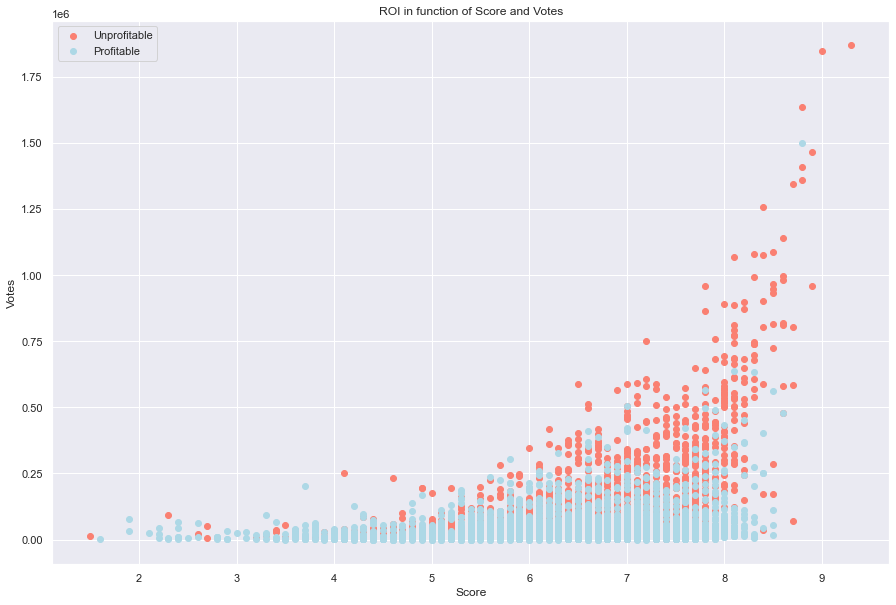

In [70]:
# Create another figure
plt.figure(figsize=(15,10))



# Start with Not Profitable film examples
plt.scatter(film.score[film.roi==1], 
            film.votes[film.roi==1], 
            c="salmon") # define it as a scatter figure



# Now for Profitable film examples, we want them on the same plot, so we call plt again
plt.scatter(film.score[film.roi==0], 
            film.votes[film.roi==0], 
            c="lightblue") # axis always come as (x, y)



# Add some helpful info
plt.title("ROI in function of Score and Votes")
plt.xlabel("Score")
plt.legend(["Unprofitable", "Profitable"])
plt.ylabel("Votes");

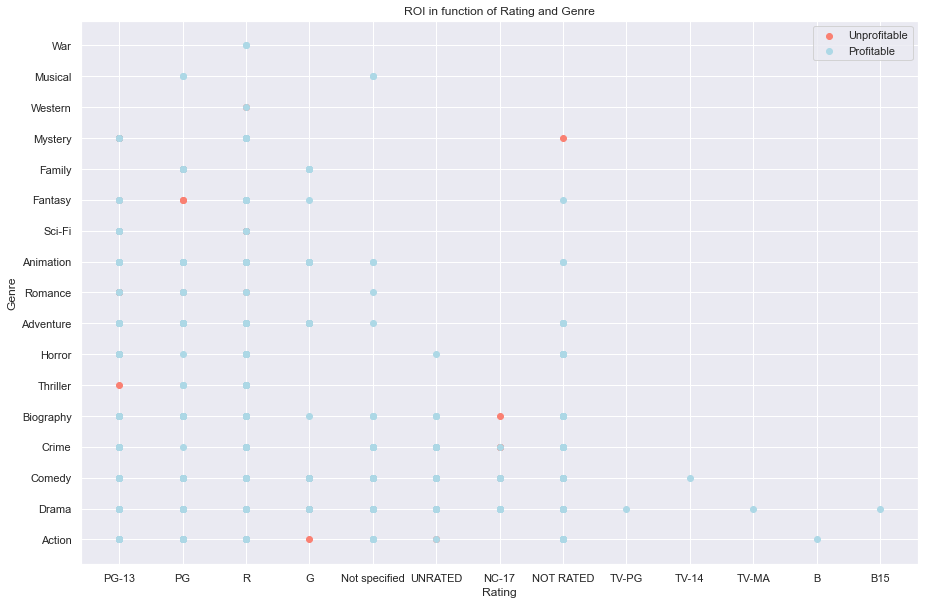

In [71]:
# Create another figure
plt.figure(figsize=(15,10))

# Start with Not Profitable film examples
plt.scatter(film.rating[film.roi==1], 
            film.genre[film.roi==1], 
            c="salmon") # define it as a scatter figure

# Now for Profitable film examples, we want them on the same plot, so we call plt again
plt.scatter(film.rating[film.roi==0], 
            film.genre[film.roi==0], 
            c="lightblue") # axis always come as (x, y)


# Add some helpful info
plt.title("ROI in function of Rating and Genre")
plt.xlabel("Rating")
plt.legend(["Unprofitable", "Profitable"])
plt.ylabel("Genre");

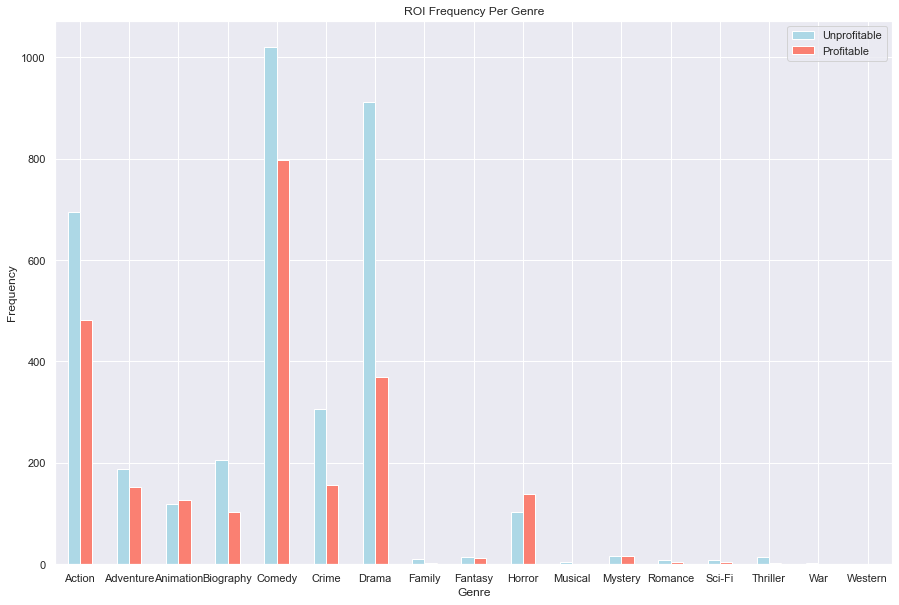

In [72]:
# Create a new crosstab and base plot
pd.crosstab(film.genre, film.roi).plot(kind="bar", 
                                   figsize=(15,10), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("ROI Frequency Per Genre")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.legend(["Unprofitable", "Profitable"])
plt.xticks(rotation = 0);

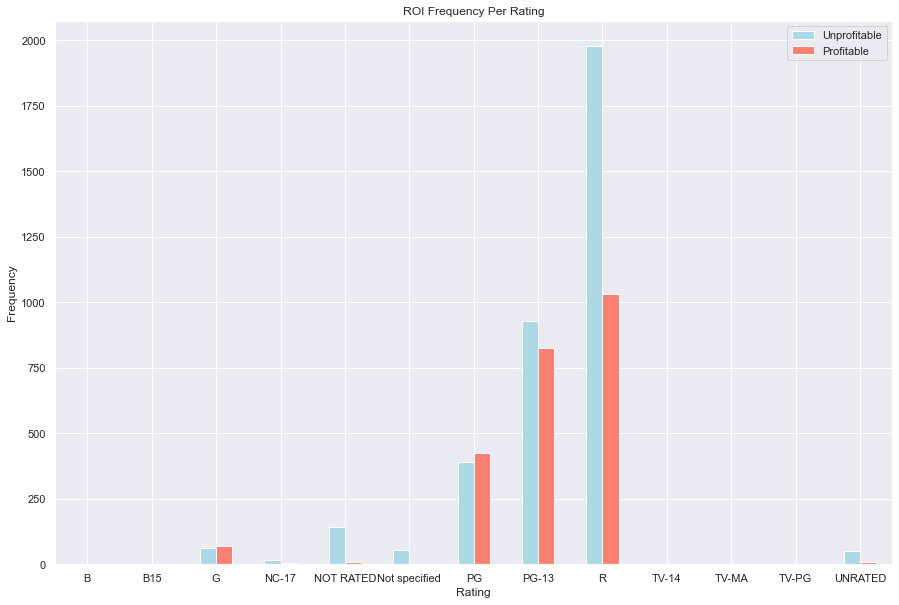

In [73]:
# Create a new crosstab and base plot
pd.crosstab(film.rating, film.roi).plot(kind="bar", 
                                   figsize=(15,10), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("ROI Frequency Per Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend(["Unprofitable", "Profitable"])
plt.xticks(rotation = 0);

### Removing outliers from the budget column

In [74]:
# film = film.loc[film['budget']>0]

In [75]:
# film['budget'].describe()

In [76]:
# film['budget'].hist();

In [77]:
# plt.rcParams['figure.figsize'] = 20,20  # control plot size
# film['budget'].plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
# plt.show()

### Correlation 

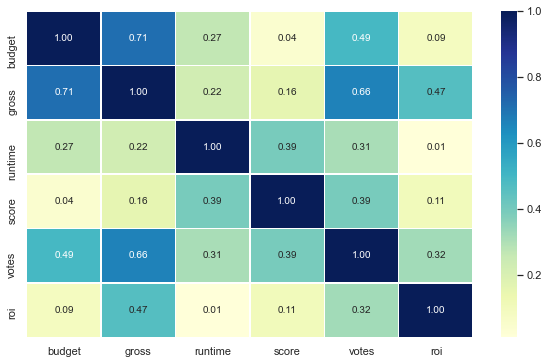

In [78]:
# Correlation heatmap of the numberic variables

corr_matrix = film.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

### Dealing with Categorical data

In [79]:
film_dtypes = film.dtypes == 'object'

In [80]:
type(film_dtypes)

pandas.core.series.Series

In [81]:
obj_cols = []
for i, feature in enumerate(film_dtypes):
    if feature:
        obj_cols.append(film_dtypes.index[i])

In [82]:
obj_cols

['country',
 'director',
 'genre',
 'name',
 'rating',
 'star',
 'studio',
 'star_ranking',
 'studio_ranking',
 'movie_popularity']

In [83]:
# obj_col_features = ['country', 'director', 'genre', 'name', 'rating', 'star', 'studio']

In [84]:
# objs_film = film.loc[:, obj_col_features]

In [85]:
objs_film = film.loc[:, obj_cols]

In [86]:
# to_delete = ['director', 'name', 'star', 'studio']

In [87]:
# objs_film = objs_film.drop(to_delete, axis = 1 )

In [88]:
objs_film.head()

,country,director,genre,name,rating,star,studio,star_ranking,studio_ranking,movie_popularity
0,non_USA,James Cameron,Action,Avatar (2009),PG-13,Sam Worthington,Twentieth Century Fox Film Corporation,famous,top_known,popular_movies
1,USA,John Polson,Drama,Swimfan (2002),PG-13,Jesse Bradford,Twentieth Century Fox Film Corporation,famous,least_known,popular_movies
2,USA,Daniel Petrie Jr.,Comedy,In the Army Now (1994),PG,Pauly Shore,Hollywood Pictures,famous,least_known,popular_movies
3,USA,Nicholas Hytner,Comedy,The Object of My Affection (1998),R,Jennifer Aniston,Twentieth Century Fox Film Corporation,famous,least_known,popular_movies
4,non_USA,Anton Corbijn,Crime,A Most Wanted Man (2014),R,Philip Seymour Hoffman,Lionsgate,not_famous,least_known,popular_movies


### Factorizing Genre & Rating into lower levels

In [89]:
objs_film['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
TV-PG               1
B                   1
TV-MA               1
B15                 1
TV-14               1
Name: rating, dtype: int64

In [90]:
objs_film['rating'].unique()

array(['PG-13', 'PG', 'R', 'G', 'Not specified', 'UNRATED', 'NC-17',
       'NOT RATED', 'TV-PG', 'TV-14', 'TV-MA', 'B', 'B15'], dtype=object)

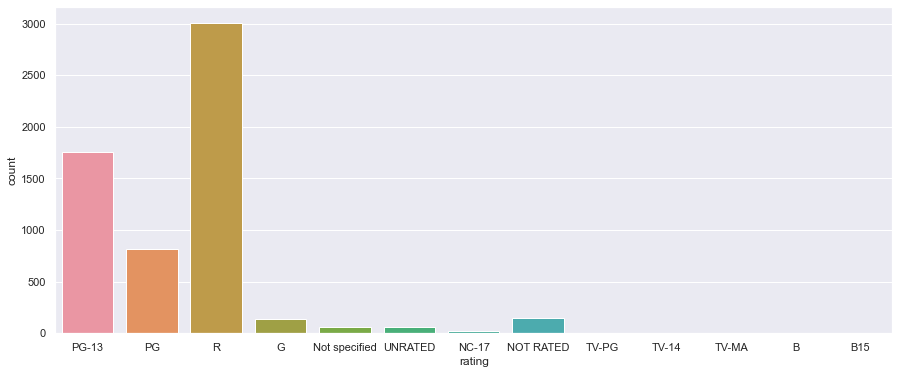

In [91]:
plt.figure(figsize=(15,6))
sns.countplot(x='rating', data=objs_film);

In [92]:
objs_film = objs_film.replace(to_replace =["PG-13","PG","G","TV-PG"] ,  value ="PG")
objs_film = objs_film.replace(to_replace =["Not specified","UNRATED","NOT RATED","B", "TV-14","B15"] ,  value ="NR")
objs_film = objs_film.replace(to_replace =["R","TV-MA","NC-17"] ,  value ="R")

In [93]:
# objs_film['rating'] = objs_film['rating'].replace({'Not specified': 'NOT RATED',
                                                    # 'NC-17': 'NOT RATED',
                                                    # 'UNRATED': 'NOT RATED',
                                                   #  'TV-PG': 'NOT RATED',
                                                   #  'B15': 'NOT RATED',
                                                   #  'TV-MA': 'NOT RATED',
                                                   #  'G': 'NOT RATED',
                                                   #  'TV-14': 'NOT RATED',
                                                   #  'B': 'NOT RATED'})

In [94]:
objs_film['rating'].unique()

array(['PG', 'R', 'NR'], dtype=object)

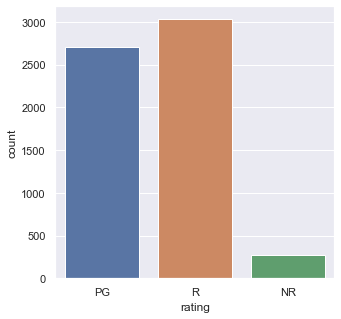

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(x='rating', data=objs_film);

In [96]:
objs_film['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
Western         2
War             2
Name: genre, dtype: int64

In [97]:
objs_film['genre'].unique()

array(['Action', 'Drama', 'Comedy', 'Crime', 'Biography', 'Thriller',
       'Horror', 'Adventure', 'Romance', 'Animation', 'Sci-Fi', 'Fantasy',
       'Family', 'Mystery', 'Western', 'Musical', 'War'], dtype=object)

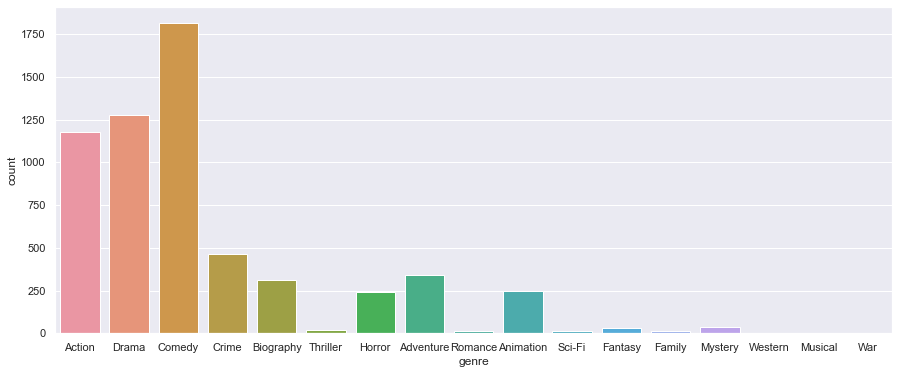

In [98]:
plt.figure(figsize=(15,6))
sns.countplot(x='genre', data=objs_film);

In [99]:
objs_film = objs_film.replace(to_replace =["Crime","Adventure","Biography","Animation","Horror","Mystery",
                                                   "Fantasy","Thriller","Romance","Sci-Fi","Family","Musical",
                                                   "War","Western"], value ="Others")

In [100]:
# objs_film['genre'] = objs_film['genre'].replace({'Mystery' : 'Other',
                                                   #  'Fantasy': 'Other',
                                                   #  'Thriller': 'Other',
                                                   #  'Romance': 'Other',
                                                   #  'Sci-Fi': 'Other',
                                                   #  'Family': 'Other',
                                                   #  'Musical': 'Other',
                                                   #  'War' : 'Other',
                                                   # 'Western' : 'Other'})

In [101]:
objs_film['genre'].unique()

array(['Action', 'Drama', 'Comedy', 'Others'], dtype=object)

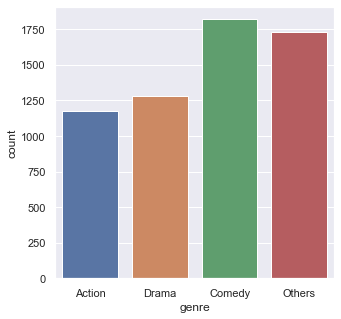

In [102]:
plt.figure(figsize=(5,5))
sns.countplot(x='genre', data=objs_film);

In [103]:
objs_film.columns

Index(['country', 'director', 'genre', 'name', 'rating', 'star', 'studio',
       'star_ranking', 'studio_ranking', 'movie_popularity'],
      dtype='object')

In [104]:
col_to_delete = ['director', 'star', 'studio', 'name']

### Transforming Categorical Data into Dummies

In [105]:
to_be_encoded = ['country', 'genre', 'rating', 'star_ranking', 'studio_ranking', 'movie_popularity']

In [106]:
#Performing Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(objs_film[to_be_encoded])

In [107]:
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(to_be_encoded))

onehot_encoded_frame.head()

,country_USA,country_non_USA,genre_Action,genre_Comedy,genre_Drama,genre_Others,rating_NR,rating_PG,rating_R,star_ranking_GÃ©rard Depardieu,star_ranking_famous,star_ranking_not_famous,studio_ranking_least_known,studio_ranking_top_known,movie_popularity_popular_movies,movie_popularity_unpopular_movies
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [108]:
onehot_encoded_frame.shape

(6000, 16)

In [109]:
onehot_encoded_frame.columns

Index(['country_USA', 'country_non_USA', 'genre_Action', 'genre_Comedy',
       'genre_Drama', 'genre_Others', 'rating_NR', 'rating_PG', 'rating_R',
       'star_ranking_GÃ©rard Depardieu', 'star_ranking_famous',
       'star_ranking_not_famous', 'studio_ranking_least_known',
       'studio_ranking_top_known', 'movie_popularity_popular_movies',
       'movie_popularity_unpopular_movies'],
      dtype='object')

In [110]:
# to_be_dummied = ['country', 'genre', 'rating', 'star_names', 'studio_names', 'movie_names']

In [111]:
# objs_dummied = pd.get_dummies(objs_film[to_be_dummied], drop_first=True) 
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. 
# Hence it reduces the correlations created among dummy variables.

In [112]:
#  objs_dummied.head()

In [113]:
# objs_dummied.shape

In [114]:
# objs_dummied.columns

### Numerical Data

In [115]:
cols_types = film.dtypes != 'object'
inds = cols_types.index
numeric_cols = []
for i, col in enumerate(cols_types):
    if col:
        numeric_cols.append(inds[i])

In [116]:
numeric_cols

['budget', 'gross', 'runtime', 'score', 'votes', 'roi']

In [117]:
numeric_cols = film.loc[:, numeric_cols]

In [118]:
numeric_cols.head()

,budget,gross,runtime,score,votes,roi
0,237000000,760507625,162,7.8,958400,1
1,8500000,28563926,85,5.0,17155,1
2,11000000,28864707,91,4.8,10674,1
3,15000000,29106737,111,6.0,16576,1
4,15000000,17237244,122,6.8,62915,1


### Concatenate Categorical & Numerical Data into Clean One file

In [119]:
clean_film = pd.concat([numeric_cols, onehot_encoded_frame], axis = 1, sort = False)

In [120]:
# clean_film = pd.concat([numeric_cols, objs_dummied], axis = 1, sort = False)

In [121]:
clean_film.head().T

,0,1,2,3,4
budget,237000000.0,8500000.0,11000000.0,15000000.0,15000000.0
gross,760507625.0,28563926.0,28864707.0,29106737.0,17237244.0
runtime,162.0,85.0,91.0,111.0,122.0
score,7.8,5.0,4.8,6.0,6.8
votes,958400.0,17155.0,10674.0,16576.0,62915.0
roi,1.0,1.0,1.0,1.0,1.0
country_USA,0.0,1.0,1.0,1.0,0.0
country_non_USA,1.0,0.0,0.0,0.0,1.0
genre_Action,1.0,0.0,0.0,0.0,0.0
genre_Comedy,0.0,0.0,1.0,1.0,0.0


In [122]:
clean_film.shape

(6000, 22)

### Feature Selection using ML

In [123]:
X = clean_film.drop(['roi'], axis = 1)
y = clean_film.roi

In [124]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X, y,
                                               test_size = .2,
                                               random_state=42)


[11:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.26794365 0.6162972  0.01035086 0.01122101 0.0122467  0.01121413
 0.         0.00835225 0.018743   0.01797673 0.01449714 0.
 0.00577625 0.00538112 0.         0.         0.         0.
 0.         0.         0.        ]


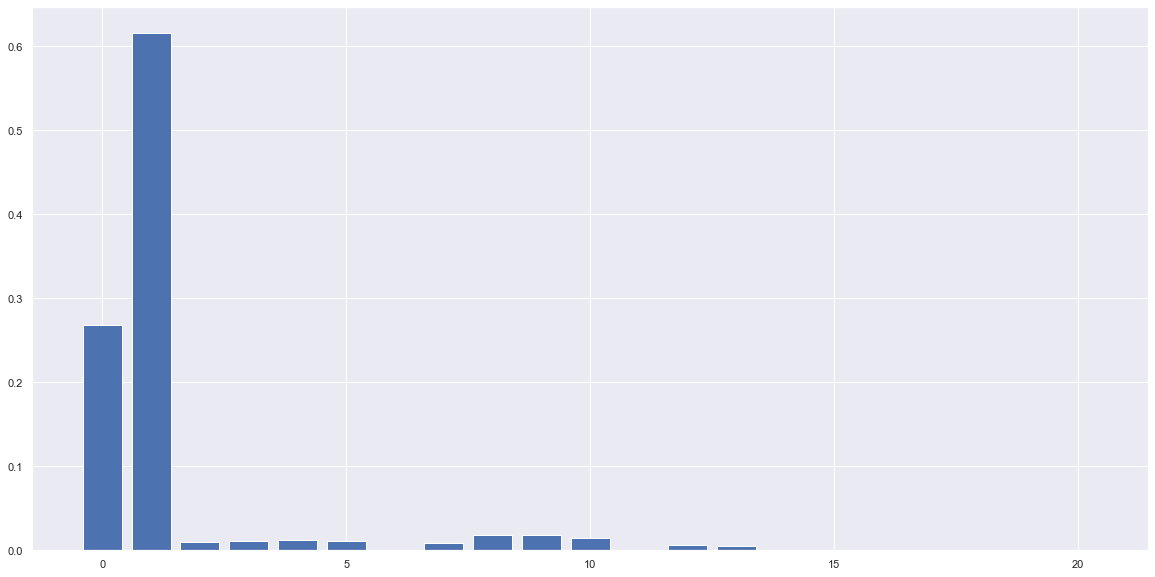

In [125]:
# Bar Plot feature importances

from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [126]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(100, 'Importance Coef')

,Importance Coef,Features
1,0.616297,gross
0,0.267944,budget
8,0.018743,genre_Comedy
9,0.017977,genre_Drama
10,0.014497,genre_Others
4,0.012247,votes
3,0.011221,score
5,0.011214,country_USA
2,0.010351,runtime
7,0.008352,genre_Action


In [127]:
clean_film.columns

Index(['budget', 'gross', 'runtime', 'score', 'votes', 'roi', 'country_USA',
       'country_non_USA', 'genre_Action', 'genre_Comedy', 'genre_Drama',
       'genre_Others', 'rating_NR', 'rating_PG', 'rating_R',
       'star_ranking_GÃ©rard Depardieu', 'star_ranking_famous',
       'star_ranking_not_famous', 'studio_ranking_least_known',
       'studio_ranking_top_known', 'movie_popularity_popular_movies',
       'movie_popularity_unpopular_movies'],
      dtype='object')

In [128]:
to_delete = ['rating_R','movie_popularity_popular_movies', 'studio_ranking_top_known',
             'star_ranking_not_famous', 'genre_Others', 'rating_PG', 'rating_NR', 'genre_Drama', 'genre_Action',
            'country_non_USA', 'movie_popularity_unpopular_movies']

In [129]:
clean_film = clean_film.drop(to_delete, axis = 1 )

In [130]:
clean_film.head()

,budget,gross,runtime,score,votes,roi,country_USA,genre_Comedy,star_ranking_GÃ©rard Depardieu,star_ranking_famous,studio_ranking_least_known
0,237000000,760507625,162,7.8,958400,1,0.0,0.0,0.0,1.0,0.0
1,8500000,28563926,85,5.0,17155,1,1.0,0.0,0.0,1.0,1.0
2,11000000,28864707,91,4.8,10674,1,1.0,1.0,0.0,1.0,1.0
3,15000000,29106737,111,6.0,16576,1,1.0,1.0,0.0,1.0,1.0
4,15000000,17237244,122,6.8,62915,1,0.0,0.0,0.0,0.0,1.0


In [131]:
clean_film.to_csv("box_office_predictions_v2.csv")